In [9]:
#Basic imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
#Modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Warnings and display 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)

In [10]:
#Load dataset 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Age,Gender,Marital Status,Number of Dependents,Household Size,Education Level,Occupation,Years in Current Job,Income Level,Credit Score,Number of Credit Inquiries,Housing Status,City or Region of Residence,Previous Bankruptcy Status,Health Condition,Family Health History,Marital History,Residency Stability,Financial Stability of Parents,Average Monthly Expenses,Credit Card Usage,Savings Rate,Number of Loans Taken,Mortgage Information,Investment Accounts,Emergency Fund Status,Loan Delinquencies History,Bank Account Activity,Tax Filing History,Utility Bills Payment History,Number of Credit Cards Held,Job Loss,Divorce History,Major Medical Emergency,Adoption History,Bankruptcy History,Health-related Legal Claims,Domestic or International Relocation,Local Unemployment Rate,Inflation Rate,Interest Rates,Economic Sentiment,Risk Tolerance,Financial Planner Involvement,Debt-to-Income Ratio,Life Insurance Adequacy,Long-term Financial Goals,Risk Profile
0,56,1,2,4,5,2,2,11,0,425,1,0,1,0,2,1,0,0,1,4353,1543,0.120379,2,212044,53433,12910,4,39,0,0,2,1,1,0,1,0,0,1,8.302827,0.642391,6.393131,0,3,1,0.326709,0,2,1
1,69,0,1,2,6,1,0,18,2,569,5,0,1,1,2,0,1,1,0,4275,766,0.428920,3,408619,92968,9932,1,30,1,1,3,0,1,0,1,1,0,1,1.295888,4.587659,5.369076,2,4,0,0.875858,1,1,2
2,46,1,2,1,2,0,4,17,2,717,6,1,1,1,0,0,2,0,1,3739,2064,0.639184,3,3707,91788,15805,1,27,0,0,2,1,1,0,1,0,1,1,5.524170,2.491157,4.059213,1,7,0,0.433555,1,1,0
3,32,0,0,2,6,0,0,20,2,586,8,0,1,1,1,1,2,1,1,4025,2941,0.687045,4,327741,95564,8918,0,2,1,0,1,1,0,1,0,1,0,1,5.985150,3.214968,0.592691,0,6,1,0.071399,0,1,1
4,60,0,1,1,5,0,2,18,0,675,9,0,0,0,0,1,2,1,0,4044,895,0.489271,2,270923,1032,14552,2,1,0,1,3,1,1,0,0,1,0,0,2.511423,0.323239,3.687253,0,7,0,0.364897,1,2,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Age                                   100000 non-null  int64  
 1   Gender                                100000 non-null  int64  
 2   Marital Status                        100000 non-null  int64  
 3   Number of Dependents                  100000 non-null  int64  
 4   Household Size                        100000 non-null  int64  
 5   Education Level                       100000 non-null  int64  
 6   Occupation                            100000 non-null  int64  
 7   Years in Current Job                  100000 non-null  int64  
 8   Income Level                          100000 non-null  int64  
 9   Credit Score                          100000 non-null  int64  
 10  Number of Credit Inquiries            100000 non-null  int64  
 11  H

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   20000 non-null  int64  
 1   Gender                                20000 non-null  int64  
 2   Marital Status                        20000 non-null  int64  
 3   Number of Dependents                  20000 non-null  int64  
 4   Household Size                        20000 non-null  int64  
 5   Education Level                       20000 non-null  int64  
 6   Occupation                            20000 non-null  int64  
 7   Years in Current Job                  20000 non-null  int64  
 8   Income Level                          20000 non-null  int64  
 9   Credit Score                          20000 non-null  int64  
 10  Number of Credit Inquiries            20000 non-null  int64  
 11  Housing Status 

In [17]:
train.describe()

,Age,Gender,Marital Status,Number of Dependents,Household Size,Education Level,Occupation,Years in Current Job,Income Level,Credit Score,Number of Credit Inquiries,Housing Status,City or Region of Residence,Previous Bankruptcy Status,Health Condition,Family Health History,Marital History,Residency Stability,Financial Stability of Parents,Average Monthly Expenses,Credit Card Usage,Savings Rate,Number of Loans Taken,Mortgage Information,Investment Accounts,Emergency Fund Status,Loan Delinquencies History,Bank Account Activity,Tax Filing History,Utility Bills Payment History,Number of Credit Cards Held,Job Loss,Divorce History,Major Medical Emergency,Adoption History,Bankruptcy History,Health-related Legal Claims,Domestic or International Relocation,Local Unemployment Rate,Inflation Rate,Interest Rates,Economic Sentiment,Risk Tolerance,Financial Planner Involvement,Debt-to-Income Ratio,Life Insurance Adequacy,Long-term Financial Goals,Risk Profile
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,0.501320,1.002370,1.999230,4.498360,0.998540,1.994090,14.531440,1.001980,575.442170,4.492990,0.502030,0.999840,0.499730,0.998140,0.997950,1.00051,0.500860,0.498630,2749.526120,2501.950520,0.498300,1.992260,250672.702500,50003.637050,10048.587290,1.99723,25.030660,0.497290,0.500060,2.499900,0.499520,0.497090,0.499150,0.501410,0.500370,0.500310,0.499250,5.002140,2.503508,3.500384,0.999500,4.996360,0.503880,0.500812,0.502790,0.999760,0.999250
std,17.886768,0.500001,0.814721,1.414075,1.797123,0.817597,1.411621,8.655584,0.816604,158.861066,2.870469,0.499998,0.816056,0.500002,0.816886,0.816733,0.81416,0.500002,0.500001,1296.951172,1446.160647,0.288477,1.414843,144489.027872,28853.305579,5761.834989,1.41316,14.132622,0.499995,0.500002,1.117655,0.500002,0.499994,0.500002,0.500001,0.500002,0.500002,0.500002,2.889969,1.445018,2.025346,0.815565,2.576426,0.499987,0.288860,0.499995,0.815357,0.815755
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,500.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000137,0.000016,0.000000,1.000000,0.000000,0.000005,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,7.000000,0.000000,438.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1625.000000,1247.000000,0.248323,1.000000,125125.250000,25051.500000,5087.750000,1.00000,13.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.493658,1.254031,1.745634,0.000000,3.000000,0.000000,0.250474,0.000000,0.000000,0.000000
50%,48.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,15.000000,1.000000,576.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,2751.000000,2508.000000,0.499087,2.000000,250788.000000,49947.500000,10075.500000,2.00000,25.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.005966,2.502484,3.502398,1.000000,5.000000,1.000000,0.502195,1.000000,1.000000,1.000000
75%,64.000000,1.000000,2.000000,3.000000,6.000000,2.000000,3.000000,22.000000,2.000000,714.000000

In [19]:
train.isnull().sum().sort_values(ascending=False)

Age                                     0
Gender                                  0
Loan Delinquencies History              0
Bank Account Activity                   0
Tax Filing History                      0
Utility Bills Payment History           0
Number of Credit Cards Held             0
Job Loss                                0
Divorce History                         0
Major Medical Emergency                 0
Adoption History                        0
Bankruptcy History                      0
Health-related Legal Claims             0
Domestic or International Relocation    0
Local Unemployment Rate                 0
Inflation Rate                          0
Interest Rates                          0
Economic Sentiment                      0
Risk Tolerance                          0
Financial Planner Involvement           0
Debt-to-Income Ratio                    0
Life Insurance Adequacy                 0
Long-term Financial Goals               0
Emergency Fund Status             

In [21]:
#Target Distribution 
target_dist = train['Risk Profile'].value_counts(normalize=True) * 100
print(f'Risk Profile Distribution = ' , target_dist)

Risk Profile Distribution =  Risk Profile
1    33.455
0    33.310
2    33.235
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

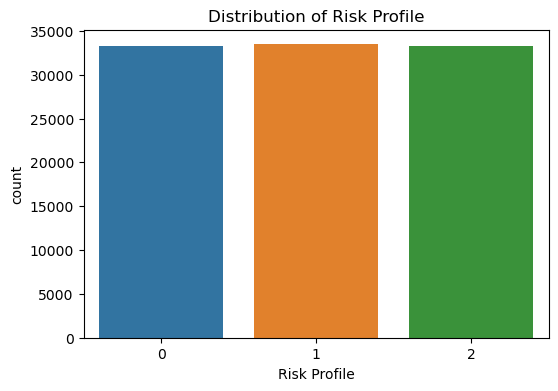

In [22]:
#Plot Target Distribution 
plt.figure(figsize=(6,4))
sns.countplot(x='Risk Profile', data=train)
plt.title('Distribution of Risk Profile')
plt.show

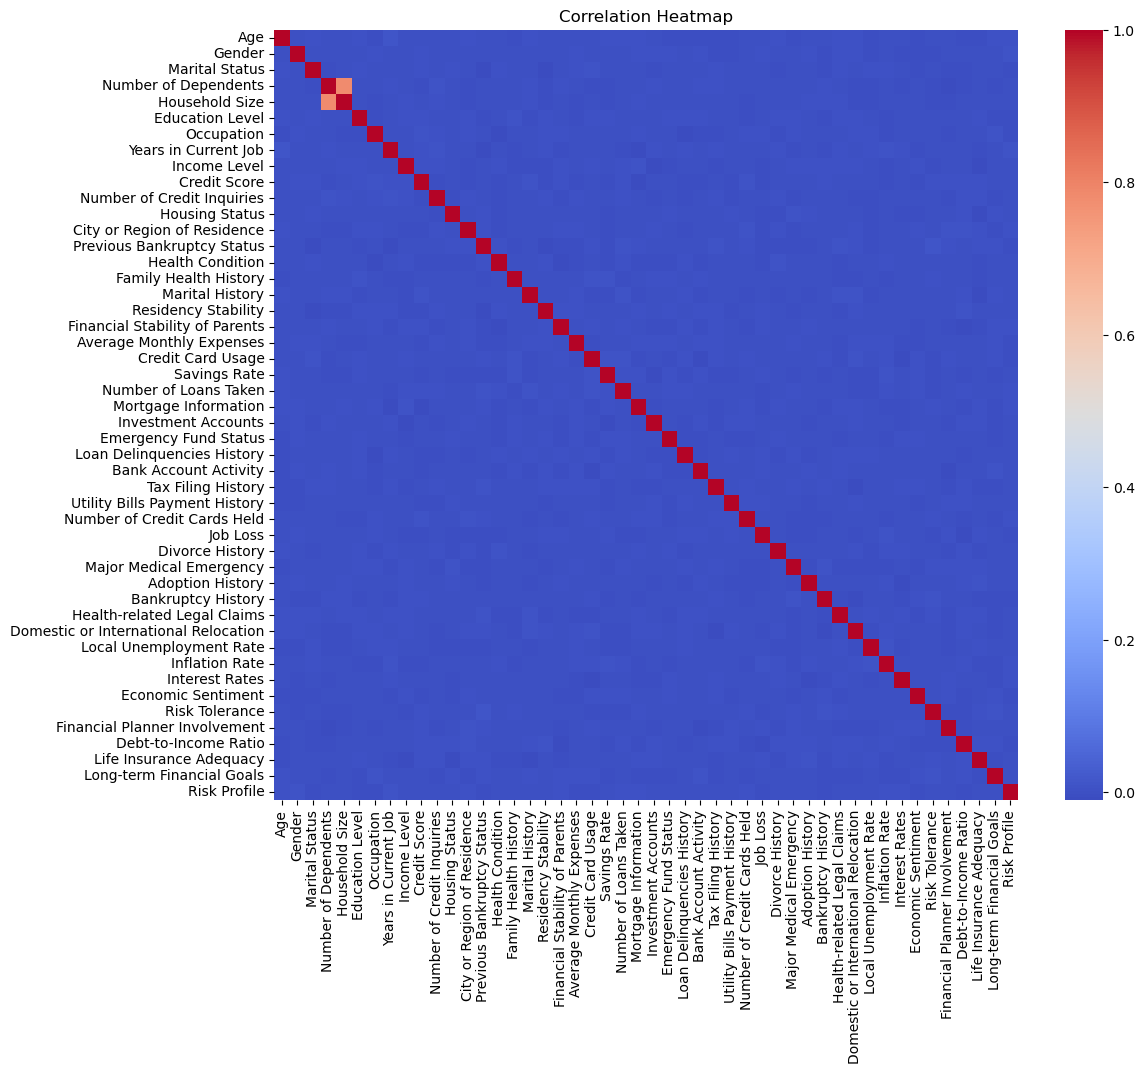

In [24]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Top 10 features correlated with Risk_Profile
correlations = train.corr()['Risk Profile'].abs().sort_values(ascending=False)
top_features = correlations[1:11]
print("Top 10 features correlated with Risk Profile:\n", top_features)

Top 10 features correlated with Risk Profile:
 Gender                   0.006095
Years in Current Job     0.006044
Economic Sentiment       0.005532
Age                      0.005119
Education Level          0.004320
Bankruptcy History       0.004180
Credit Card Usage        0.004031
Job Loss                 0.003764
Debt-to-Income Ratio     0.003651
Number of Loans Taken    0.003521
Name: Risk Profile, dtype: float64


In [27]:
# Top 10 features correlated with Risk_Profile
correlations = train.corr()['Risk Profile'].abs().sort_values(ascending=False)
top_features = correlations[1:11]
print("Top 10 features correlated with Risk Profile:\n", top_features)

Top 10 features correlated with Risk Profile:
 Gender                   0.006095
Years in Current Job     0.006044
Economic Sentiment       0.005532
Age                      0.005119
Education Level          0.004320
Bankruptcy History       0.004180
Credit Card Usage        0.004031
Job Loss                 0.003764
Debt-to-Income Ratio     0.003651
Number of Loans Taken    0.003521
Name: Risk Profile, dtype: float64


<h1>EDA Insights:</h1>


- The target variable (Risk_Profile) is evenly distributed among  Healthy, Moderate Risk, and High Risk, as expected for synthetic data.

- The most correlated features with Risk_Profile are Local_Unemployment_Rate, Job_Loss, Long_term_Financial_Goals, Credit_Score, Number_of_Credit_Inquiries, Gender, Tax_Filing_History, Marital_Status, Loan_Delinquencies_History, and Savings_Rate.

- Correlations are generally weak, indicating the need for a robust machine learning approach.

Text(0.5, 1.0, 'Education Level vs Risk Profile')

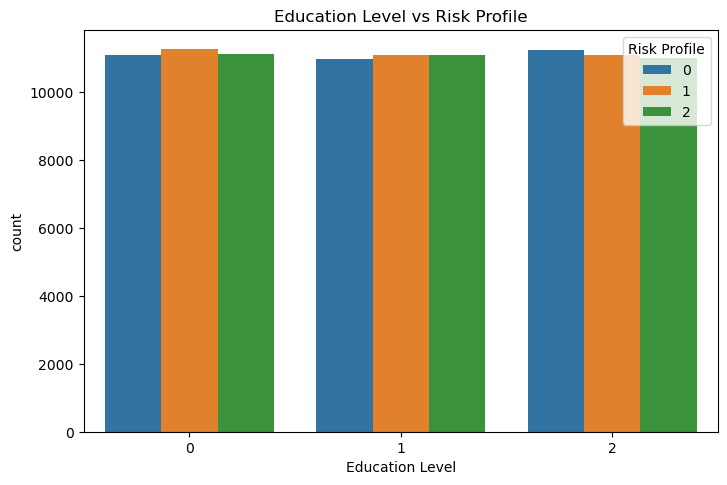

In [31]:
#Education Level vs Risk Profile
plt.figure(figsize=(18,24))

plt.subplot(4,2,1)
sns.countplot(data= train, x='Education Level', hue='Risk Profile')
plt.title("Education Level vs Risk Profile")

**Education Level vs Risk Profile**  
   - Higher education levels (Graduate) slightly associate with fewer high-risk profiles.
   - Those with only High School education have a higher proportion of risky profiles.


Text(0.5, 1.0, 'Ocupation vs Risk Profile')

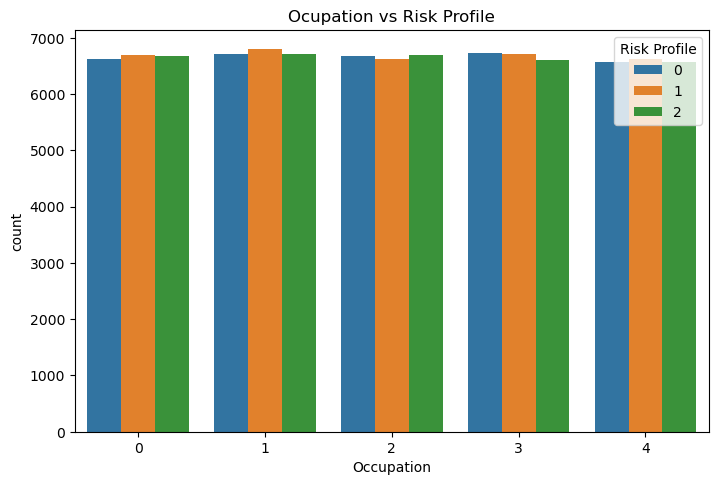

In [33]:
#Ocupation vs Risk Profile
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Occupation' , hue='Risk Profile')
plt.title('Ocupation vs Risk Profile')

**Occupation vs Risk Profile**  
   - Certain jobs (e.g., Artist, Salesperson) appear more frequently in moderate and high risk categories.
   - Stable occupations (e.g., Engineer, Doctor) show better financial health.

Text(0.5, 1.0, 'Housing Status vs Risk Profile')

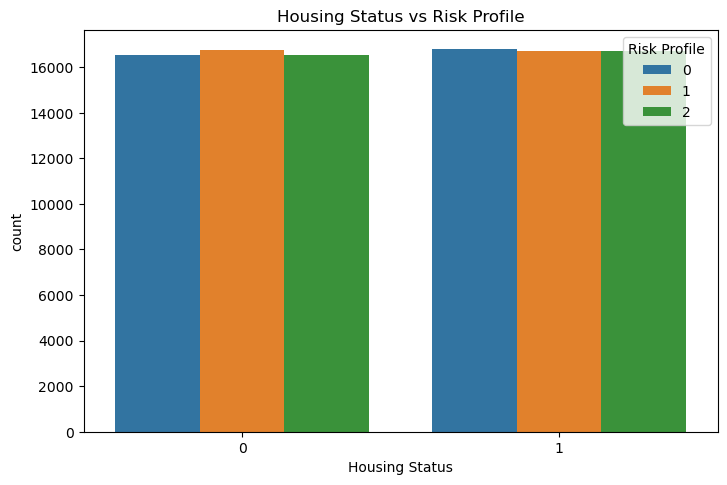

In [42]:
# Housing Status vs Risk Profile
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Housing Status' , hue='Risk Profile')
plt.title('Housing Status vs Risk Profile')

 **Housing Status vs Risk Profile**  
   - Renters tend to fall more into the high-risk profile compared to owners.

Text(0.5, 1.0, 'Credit score vs Risk Profile')

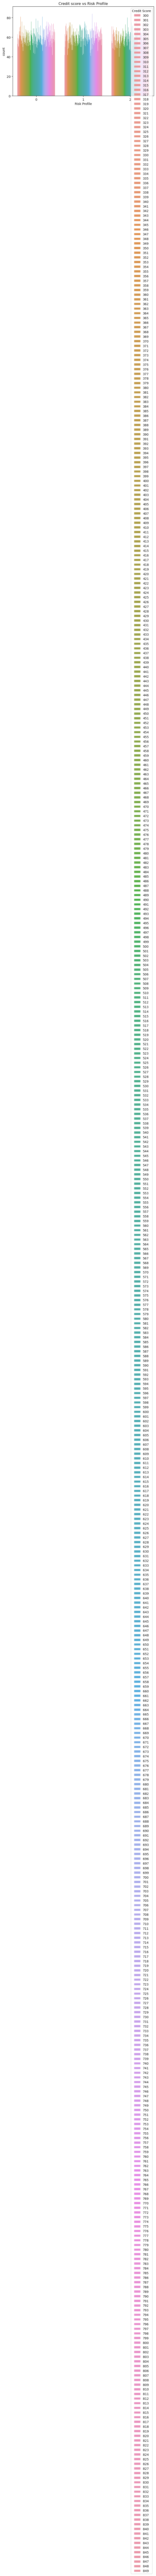

In [40]:
# Credit score vs Risk Profile
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Risk Profile' , hue='Credit Score')
plt.title('Credit score vs Risk Profile')

 **Credit Score vs Risk Profile**  
   - Healthy profiles have higher median credit scores.
   - High risk individuals often have scores below 600.

Text(0.5, 1.0, 'Risk Tolerance vs Risk Profile')

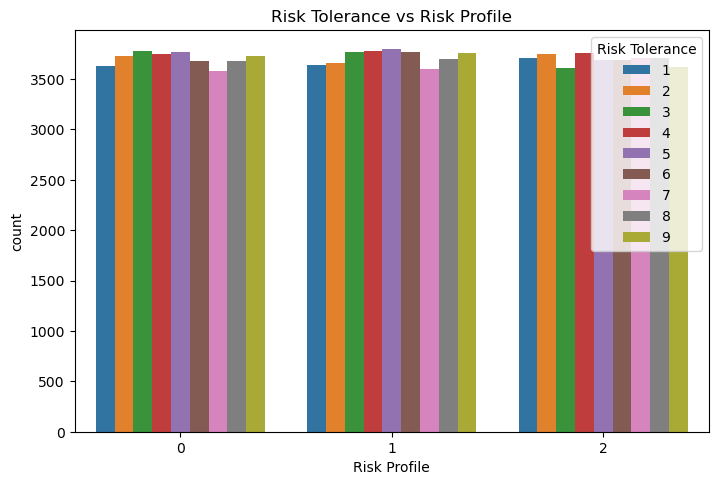

In [46]:
# Risk Tolerance vs Risk Profile
plt.figure(figsize= (18,24))
plt.subplot(4,2,2)
sns.countplot(data=train , x='Risk Profile' , hue='Risk Tolerance')
plt.title('Risk Tolerance vs Risk Profile')

**Risk Tolerance vs Risk Profile**  
   - Those with higher risk tolerance (7–10) are slightly more likely to fall into high-risk financial categories.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Load your dataset here (replace with your actual data loading)
# df = pd.read_excel('your_data.xlsx')

# Defining training features and target
X_train = train.drop('Risk_Profile', axis=1)
y_train = test['Risk_Profile']

#defining test features and target 
X_test = test.drop("Risk Profile ", axis=1)
y_test = test["Risk Profile"]

# Identify categorical and numerical columns
categorical_cols = [
    'Gender', 'Marital_Status', 'Education_Level', 'Occupation', 'Housing_Status',
    'City_or_Region_of_Residence', 'Previous_Bankruptcy_Status', 'Health_Condition',
    'Family_Health_History', 'Residency_Stability', 'Financial_Stability_of_Parents',
    'Tax_Filing_History', 'Utility_Bills_Payment_History', 'Job_Loss', 'Divorce_History',
    'Major_Medical_Emergency', 'Adoption_History', 'Bankruptcy_History', 'Health_related_Legal_Claims',
    'Domestic_or_International_Relocation', 'Economic_Sentiment', 'Financial_Planner_Involvement',
    'Life_Insurance_Adequacy', 'Long_term_Financial_Goals'
]
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])


# Define models to evaluate
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
best_accuracy = 0
best_model = None

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': pipeline,
        'accuracy': accuracy,
        'report': report
    }
    
    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# Display results
print("Model Performance Summary:\n")
for name, result in results.items():
    print(f"=== {name} ===")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])
    print("\n")

# Final best model summary
print(f"Best Model: {best_model} with accuracy {best_accuracy:.4f}")
print("Best Model Parameters:")
print(results[best_model]['model'].get_params())


ModuleNotFoundError: No module named 'xgboost'